In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

#Listing available styles
print(plt.style.available) 

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [2]:
plt.style.use('seaborn-v0_8-whitegrid')

In [3]:
eda_df = pd.read_csv('/Users/wairimunganga/Desktop/DAS_and_ML/real_estate_dirty_data.csv')

In [4]:
# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
eda_df.head()

First few rows of the dataset:


,property_id,address,property_type,price,bedrooms,bathrooms,square_footage,year_built,days_on_market,listing_status,agent
0,8270.0,123 Elm St,Condo,8642307.0,2.0,4.5,17082.0,1962.0,54.0,Sold,Agent B
1,1860.0,NaN,Apartment,2253300.0,8.0,4.0,901.0,1992.0,241.0,Sold,Agent F
2,6390.0,202 Birch St,NaN,7934779.0,NaN,7.8,12971.0,2011.0,145.0,Pending,Agent H
3,6191.0,606 Ash St,NaN,1515707.0,NaN,6.6,NaN,1954.0,161.0,Pending,Agent J
4,6734.0,404 Walnut St,Single Family,1219466.0,NaN,1.8,19898.0,1939.0,184.0,Active,Agent J


In [5]:
""" Provides count, mean, standard deviation, min, max, 
and quartiles for numerical features. """
print("\nSummary statistics for numerical features:")
eda_df.describe(include=[int, float])


Summary statistics for numerical features:


,property_id,price,bedrooms,bathrooms,square_footage,year_built,days_on_market
count,9907.000000,9.890000e+03,9903.000000,9907.000000,9894.000000,9899.000000,9922.000000
mean,5451.354295,5.779335e+06,5.037867,4.523488,11219.798363,1961.043843,194.806692
std,2582.439795,6.421024e+06,2.563372,2.022017,11778.091417,35.903582,211.951720
min,1001.000000,5.004430e+05,1.000000,1.000000,500.000000,1900.000000,0.000000
25%,3209.000000,2.921240e+06,3.000000,2.800000,5578.250000,1930.000000,90.000000
50%,5435.000000,5.318770e+06,5.000000,4.500000,10508.000000,1960.000000,180.000000
75%,7673.000000,7.721346e+06,7.000000,6.300000,15254.250000,1992.000000,273.000000
max,9998.000000,9.933999e+07,9.000000,8.000000,197930.000000,2023.000000,3460.000000


In [6]:
"""  Includes count, unique values, top values, 
and frequency for categorical features. """ 
print("\nSummary statistics for categorical features:")
eda_df.describe(include=[object])


Summary statistics for categorical features:


,address,property_type,listing_status,agent
count,9906,9911,9905,9918
unique,10,5,3,10
top,456 Oak St,Apartment,Active,Agent H
freq,1030,2081,3329,1032


In [7]:
#Identifies columns with missing data and the count of missing entries.
print("\nMissing values in each column:")
eda_df.isnull().sum()


Missing values in each column:


property_id       1093
address           1094
property_type     1089
price             1110
bedrooms          1097
bathrooms         1093
square_footage    1106
year_built        1101
days_on_market    1078
listing_status    1095
agent             1082
dtype: int64

In [8]:
# Displays the data types of each column to understand the nature of the data
print("\nData types of each column:")
eda_df.dtypes


Data types of each column:


property_id       float64
address            object
property_type      object
price             float64
bedrooms          float64
bathrooms         float64
square_footage    float64
year_built        float64
days_on_market    float64
listing_status     object
agent              object
dtype: object

In [9]:
#Unique values in categorical columns
print("\nUnique values in categorical columns:")
eda_df.select_dtypes(include=[object]).nunique()


Unique values in categorical columns:


address           10
property_type      5
listing_status     3
agent             10
dtype: int64

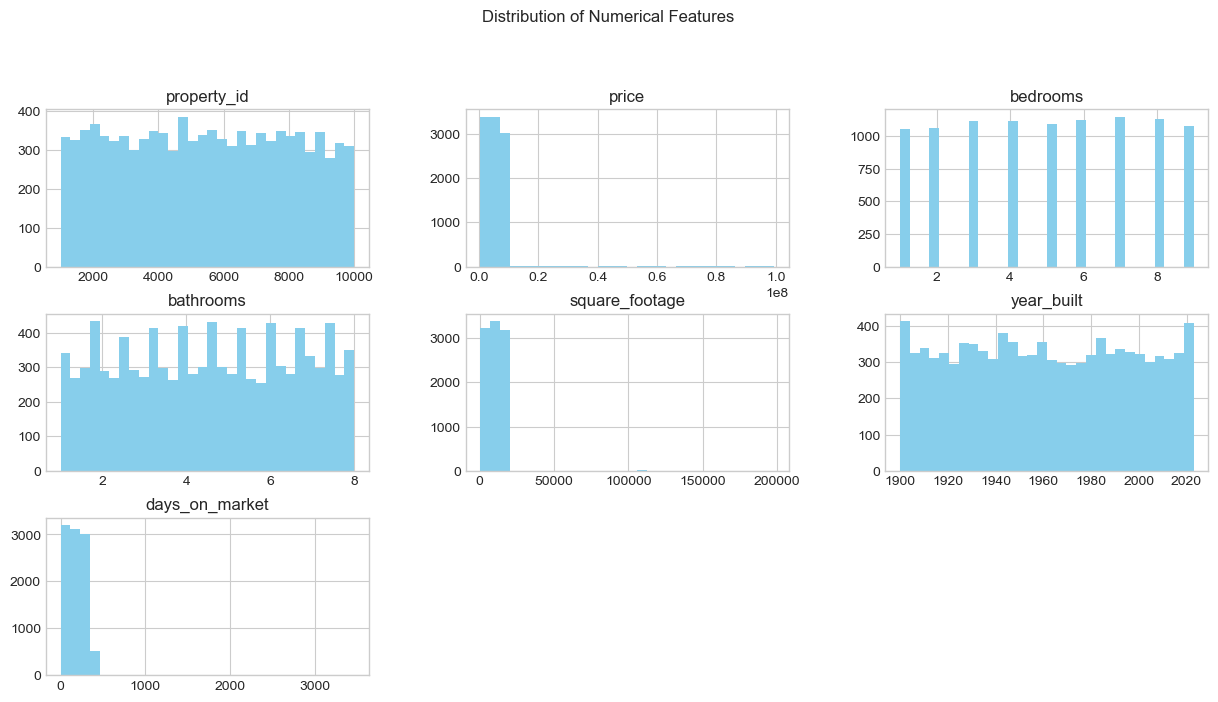

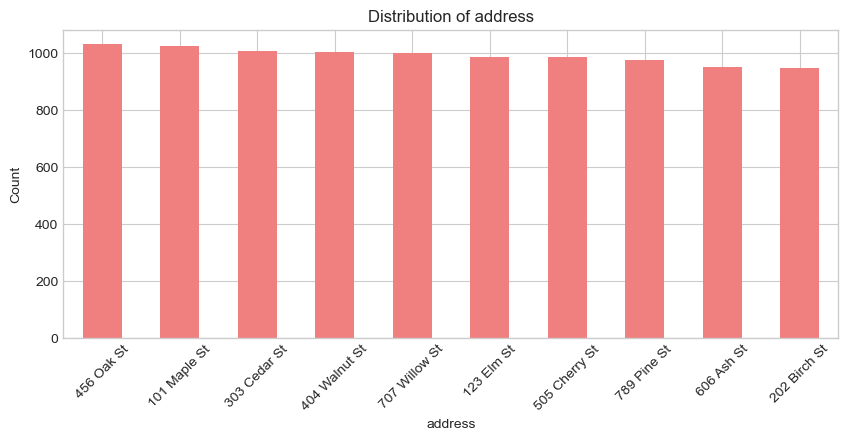

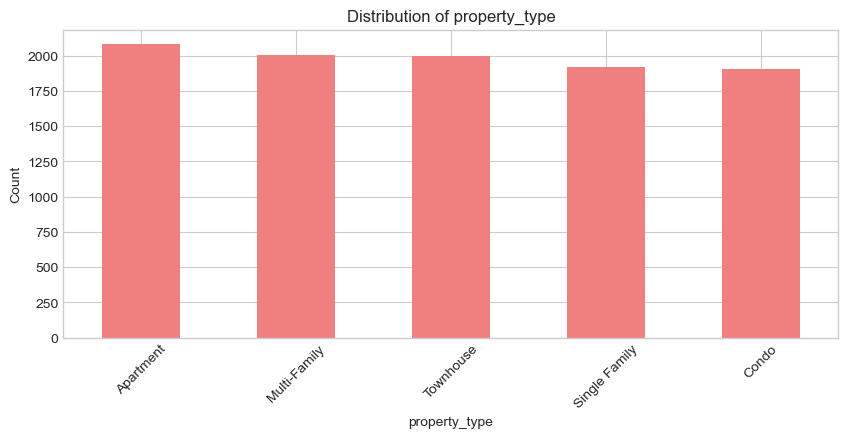

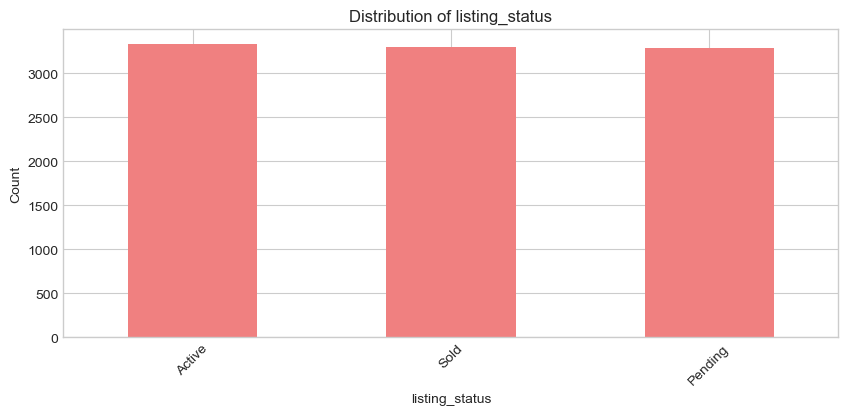

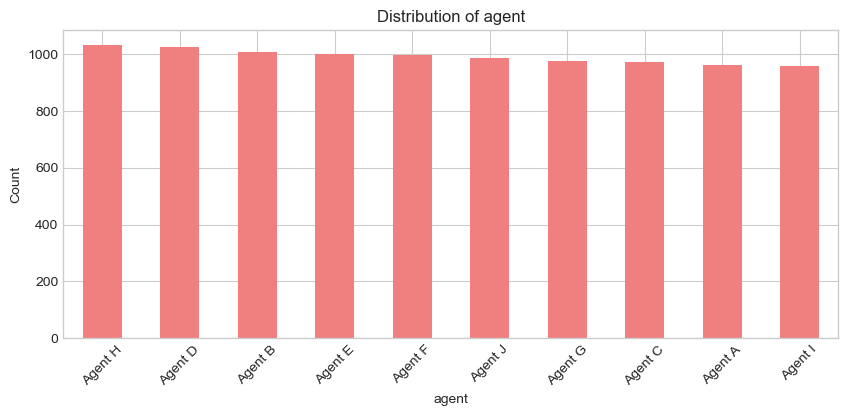

In [10]:
# Distribution of numerical features
eda_df.select_dtypes(include=[int, float]).hist(bins=30, figsize=(15, 10), layout=(4, 3), color='skyblue')
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Distribution of categorical features
for column in eda_df.select_dtypes(include=[object]).columns:
    plt.figure(figsize=(10, 4))
    eda_df[column].value_counts().plot(kind='bar', color='lightcoral')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


In [44]:
def clean_data(eda_df):
    # Drop duplicates
    eda_df = eda_df.drop_duplicates()

    # Fill missing values
    # For numerical columns, use median
    numerical_columns = ['price', 'square_footage', 'bedrooms', 'bathrooms', 'year_built', 'days_on_market']
    for column in numerical_columns:
        eda_df.loc[:, column] = eda_df[column].fillna(eda_df[column].median())

    # For categorical columns, use a placeholder
    categorical_columns = ['address', 'property_type', 'listing_status', 'agent']
    for column in categorical_columns:
        eda_df.loc[:, column] = eda_df[column].fillna('Unknown')

    # Convert data types
    eda_df.loc[:, 'price'] = eda_df['price'].astype(float)
    eda_df.loc[:, 'square_footage'] = eda_df['square_footage'].astype(float)
    
    # Ensure 'bedrooms', 'bathrooms', and 'year_built' are integers
    eda_df.loc[:, 'bedrooms'] = eda_df['bedrooms'].fillna(0).astype(int)
    eda_df.loc[:, 'bathrooms'] = eda_df['bathrooms'].fillna(0).astype(int)
    eda_df.loc[:, 'year_built'] = eda_df['year_built'].fillna(0).astype(int)
    eda_df.loc[:, 'days_on_market'] = eda_df['days_on_market'].astype(int)

    return eda_df

# Cleaning the DataFrame
cleaned_df = clean_data(eda_df)

print("\nCleaned DataFrame:")
print(cleaned_df.head(30))

# Summary statistics after cleaning
print("\nSummary Statistics After Cleaning:")
print(cleaned_df.describe(include='all'))



Cleaned DataFrame:
    property_id        address  property_type       price  bedrooms  \
0        8270.0     123 Elm St          Condo   8642307.0       2.0   
1        1860.0        Unknown      Apartment   2253300.0       8.0   
2        6390.0   202 Birch St        Unknown   7934779.0       5.0   
3        6191.0     606 Ash St        Unknown   1515707.0       5.0   
4        6734.0  404 Walnut St  Single Family   1219466.0       5.0   
5        7265.0     456 Oak St   Multi-Family   2397606.0       4.0   
6           NaN  404 Walnut St          Condo   1166620.0       8.0   
7        5426.0    789 Pine St        Unknown  76102380.0       3.0   
8           NaN     123 Elm St  Single Family   8986822.0       3.0   
9        9322.0  505 Cherry St        Unknown   9541781.0       8.0   
10       2685.0    789 Pine St      Townhouse   9195933.0       3.0   
11       1769.0  505 Cherry St  Single Family   7971944.0       2.0   
12       7949.0        Unknown      Apartment   9377349.0

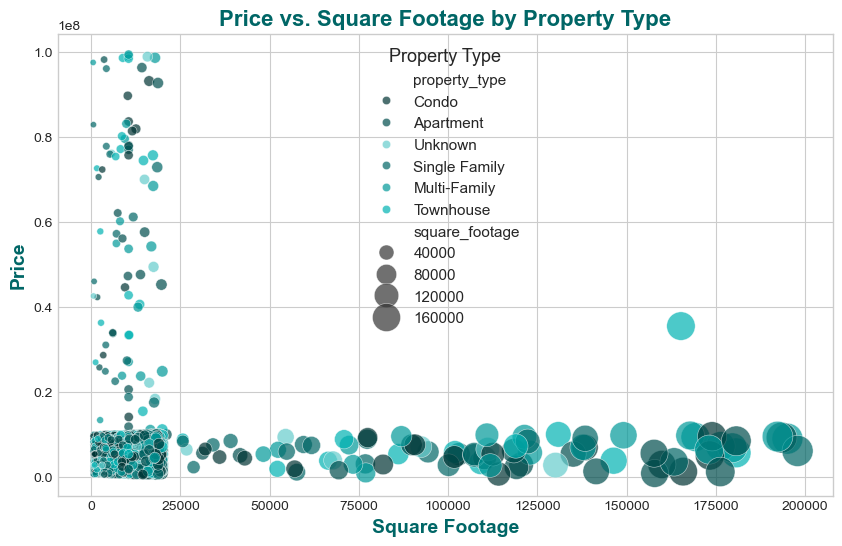

In [12]:
plt.figure(figsize=(10, 6))
# Defining a monochromatic turquoise color palette
palette = {
    'Condo': '#003333',
    'Apartment': '#004d4d',
    'Single Family': '#006666',
    'Multi-Family': '#009999',
    'Townhouse': '#00b3b3',
    'Unknown': '#66cccc'
}

# Creating the scatter plot with updated parameter
sns.scatterplot(
    x='square_footage', 
    y='price', 
    data=cleaned_df, 
    hue='property_type', 
    palette=palette, 
    size='square_footage', 
    sizes=(20, 500), 
    edgecolor='w', 
    alpha=0.7
)
plt.title('Price vs. Square Footage by Property Type', fontsize=16, weight='bold', color='#006666')
plt.xlabel('Square Footage', fontsize=14, weight='bold', color='#006666')
plt.ylabel('Price', fontsize=14, weight='bold', color='#006666')
plt.legend(title='Property Type', title_fontsize='13', fontsize='11')
plt.show()



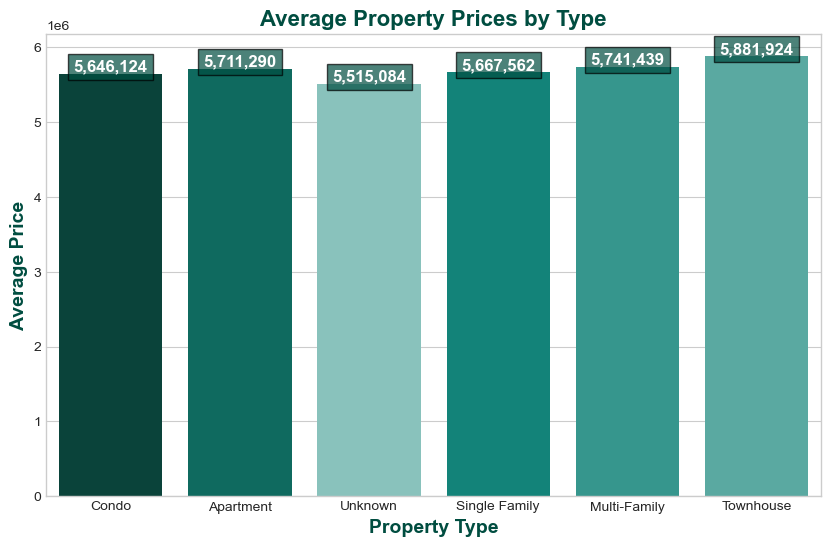

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Defining a monochromatic turquoise color palette
palette = {
    'Condo': '#004d40',  # Dark turquoise
    'Apartment': '#00796b',  # Medium turquoise
    'Single Family': '#009688',  # Lighter turquoise
    'Multi-Family': '#26a69a',  # Light turquoise
    'Townhouse': '#4db6ac',  # Very light turquoise
    'Unknown': '#80cbc4'  # Pale turquoise
}

plt.figure(figsize=(10, 6))

# Creating the bar plot with updated parameter
ax = sns.barplot(x='property_type', y='price', data=cleaned_df, estimator='mean', errorbar=None, hue='property_type', palette=palette)
plt.title('Average Property Prices by Type', fontsize=16, weight='bold', color='#004d40')
plt.xlabel('Property Type', fontsize=14, weight='bold', color='#004d40')
plt.ylabel('Average Price', fontsize=14, weight='bold', color='#004d40')

# Removing the legend if it exists
if ax.legend_:
    ax.legend_.remove()

# Adding value annotations with enhanced visibility
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', 
                va='center', 
                fontsize=12, 
                color='white',  # Change color to white for better visibility
                weight='bold',
                xytext=(0, 5),  # Add some vertical offset
                textcoords='offset points',
                bbox=dict(facecolor='#004d40', alpha=0.7))  # Add background color for better contrast

plt.show()


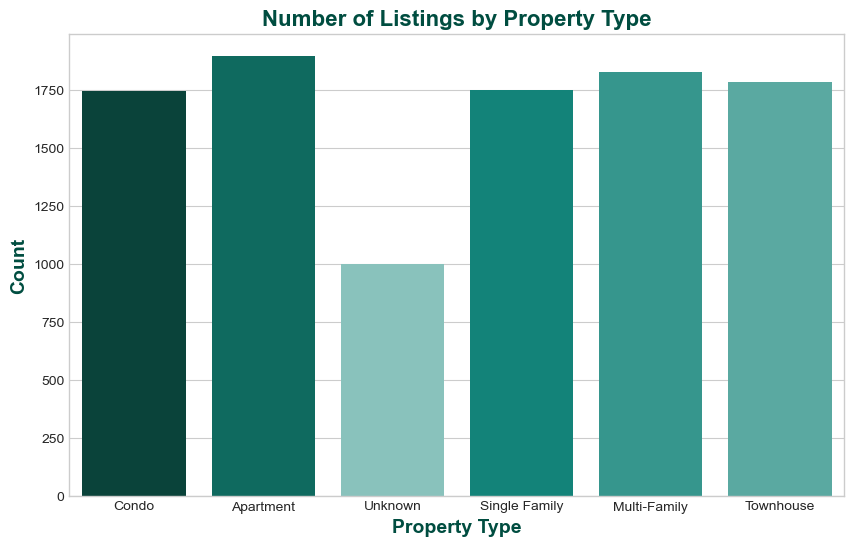

In [14]:

# Defining the monochromatic turquoise color palette
palette = {
    'Condo': '#004d40',  # Dark turquoise
    'Apartment': '#00796b',  # Medium turquoise
    'Single Family': '#009688',  # Lighter turquoise
    'Multi-Family': '#26a69a',  # Light turquoise
    'Townhouse': '#4db6ac',  # Very light turquoise
    'Unknown': '#80cbc4'  # Pale turquoise
}

plt.figure(figsize=(10, 6))

# Creating the count plot with the updated parameters
sns.countplot(x='property_type', data=cleaned_df, hue='property_type', palette=palette, legend=False)

plt.title('Number of Listings by Property Type', fontsize=16, weight='bold', color='#004d40')
plt.xlabel('Property Type', fontsize=14, weight='bold', color='#004d40')
plt.ylabel('Count', fontsize=14, weight='bold', color='#004d40')

plt.show()


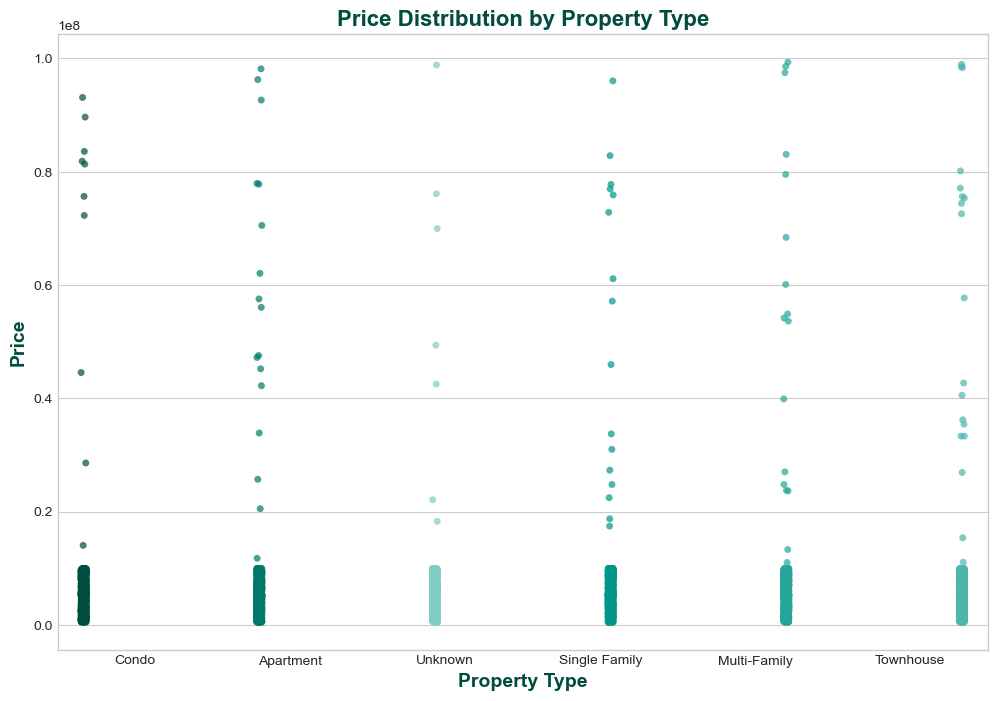

In [15]:

# Defining a monochromatic turquoise color palette
palette = {
    'Condo': '#004d40',  # Dark turquoise
    'Apartment': '#00796b',  # Medium turquoise
    'Single Family': '#009688',  # Lighter turquoise
    'Multi-Family': '#26a69a',  # Light turquoise
    'Townhouse': '#4db6ac',  # Very light turquoise
    'Unknown': '#80cbc4'  # Pale turquoise
}

plt.figure(figsize=(12, 8))

# Creating the strip plot with hue and legend disabled
sns.stripplot(x='property_type', y='price', data=cleaned_df, hue='property_type', palette=palette, jitter=True, alpha=0.7, dodge=True)

# Setting the plot title and labels
plt.title('Price Distribution by Property Type', fontsize=16, weight='bold', color='#004d40')
plt.xlabel('Property Type', fontsize=14, weight='bold', color='#004d40')
plt.ylabel('Price', fontsize=14, weight='bold', color='#004d40')

# Removing the legend
plt.legend([], [], frameon=False)

plt.show()

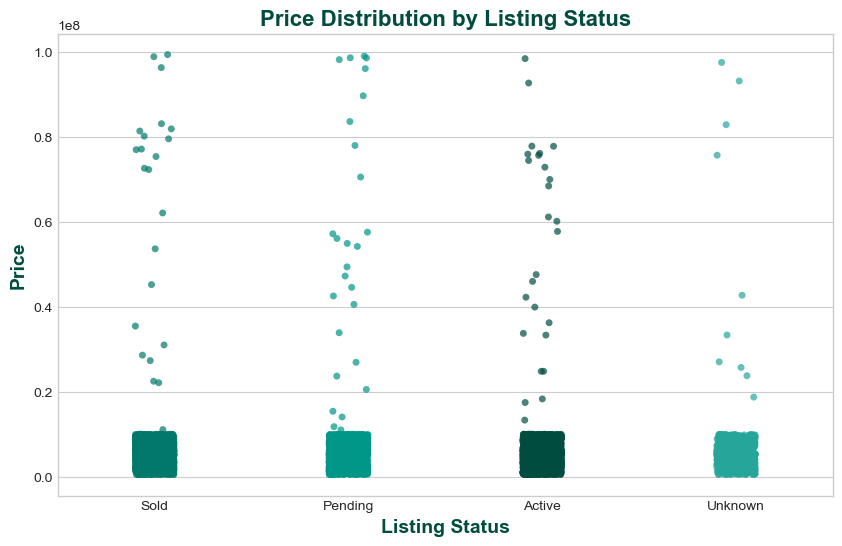

In [16]:
# Define the palette with all unique values from the 'listing_status' column
palette = {
    'Active': '#004d40',
    'Sold': '#00796b',
    'Pending': '#009688',
    'Unknown': '#26a69a'
}

# Creating a strip plot
plt.figure(figsize=(10, 6))
sns.stripplot(x='listing_status', y='price', data=cleaned_df, hue='listing_status', palette=palette, jitter=True, alpha=0.7)
plt.title('Price Distribution by Listing Status', fontsize=16, weight='bold', color='#004d40')
plt.xlabel('Listing Status', fontsize=14, weight='bold', color='#004d40')
plt.ylabel('Price', fontsize=14, weight='bold', color='#004d40')

# Removing the legend
plt.legend([], [], frameon=False)

plt.show()



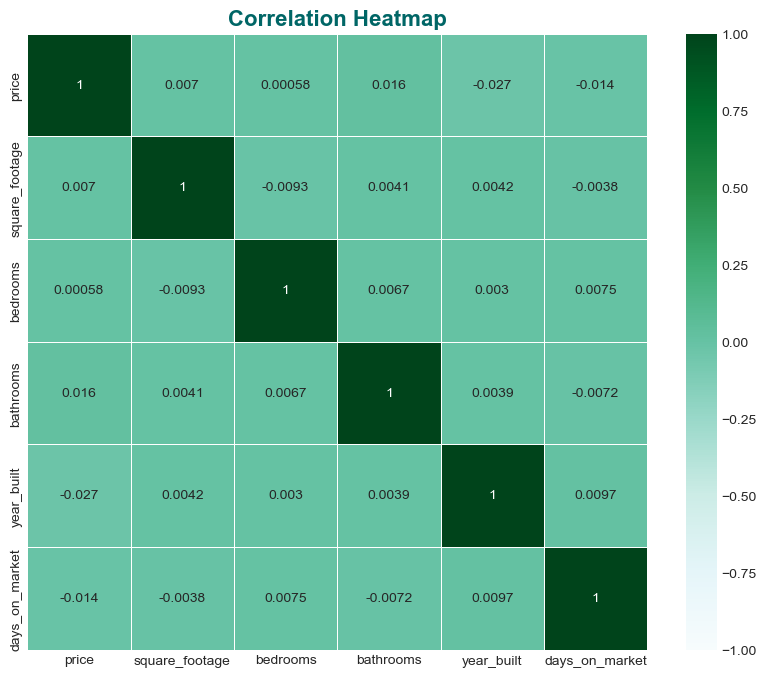

In [17]:
# Assuming you have a correlation matrix
correlation_matrix = cleaned_df[['price', 'square_footage', 'bedrooms', 'bathrooms', 'year_built', 'days_on_market']].corr()

plt.figure(figsize=(10, 8))
# Creating a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='BuGn', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap', fontsize=16, weight='bold', color='#006666')
plt.show()
